# T1.1

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

# Tema: Saúde

## SETUP

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import operator


## BASES

Base com a porcentagem de desnutrição de cada país ao longo dos anos: https://data.worldbank.org/indicator/SN.ITK.DEFC.ZS

Base com a média da expectativa de vida de cada país ao longo dos anos: https://www.kaggle.com/amarpandey/world-life-expectancy-18002016#indicator-life_expectancy_at_birth.csv


Base com o gasto do governo com a saúde de cada país ao longo dos anos: https://www.kaggle.com/angelmm/healthteethsugar#healthexpend.csv

Base com IDH do países ao longo dos anos: http://hdr.undp.org/en/data# -> Human Development Index (HDI).csv

Base com índice de HIV em cada país ao longo dos anos: http://hdr.undp.org/en/data# -> HIV prevalence, adult (% ages 15-49), total.csv

## Pergunta 1:  Qual a média de destrunição dos países agrupados por rendimento, considerando o ano de 2016?

A base 'hunger.csv' tem os dados sobre destrução dos países entre os anos de 1960 e 2018

In [2]:
dfHunger = pd.read_csv('datasets/hunger.csv')

In [3]:
dfHunger.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,Angola,AGO,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,Albania,ALB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,Andorra,AND,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,United Arab Emirates,ARE,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,Argentina,ARG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,Armenia,ARM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,American Samoa,ASM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfHunger.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997        

Criando um dicionário com os códigos de cada país e a porcentagem de desnutrição no ano de 2016

In [5]:
countryCodeHunger2016 = {}
for i in range(0, dfHunger.shape[0]):
    country_code = dfHunger.loc[i]["Country Code"]
    hungry2016 = dfHunger.loc[i]["2016"]
    if not numpy.isnan(hungry2016):
        countryCodeHunger2016[country_code] = hungry2016

In [6]:
countryCodeHunger2016

{'AFG': 30.3,
 'AGO': 23.9,
 'ALB': 5.5,
 'ARB': 12.051903242093301,
 'ARE': 2.5,
 'ARG': 3.8,
 'ARM': 4.3,
 'AUS': 2.5,
 'AUT': 2.5,
 'AZE': 2.5,
 'BEL': 2.5,
 'BEN': 10.4,
 'BFA': 21.3,
 'BGD': 15.2,
 'BGR': 3.0,
 'BIH': 2.5,
 'BLR': 2.5,
 'BLZ': 6.5,
 'BOL': 19.8,
 'BRA': 2.5,
 'BRB': 3.7,
 'BRN': 2.6,
 'BWA': 28.5,
 'CAF': 61.8,
 'CAN': 2.5,
 'CEB': 2.54898140473599,
 'CHE': 2.5,
 'CHL': 3.3,
 'CHN': 8.7,
 'CIV': 20.7,
 'CMR': 7.3,
 'COG': 37.5,
 'COL': 6.5,
 'CPV': 12.3,
 'CRI': 4.4,
 'CSS': 7.301093429660799,
 'CUB': 2.5,
 'CYP': 4.6,
 'CZE': 2.5,
 'DEU': 2.5,
 'DJI': 19.7,
 'DMA': 5.2,
 'DNK': 2.5,
 'DOM': 10.4,
 'DZA': 4.7,
 'EAP': 9.446782230696789,
 'EAR': 12.9873826032795,
 'EAS': 8.73129376362563,
 'ECA': 3.2373262947677004,
 'ECS': 2.83247400988108,
 'ECU': 7.8,
 'EGY': 4.8,
 'EMU': 2.5115618442283703,
 'ESP': 2.5,
 'EST': 2.8,
 'ETH': 21.4,
 'EUU': 2.51467488086654,
 'FCS': 26.1502685512885,
 'FIN': 2.5,
 'FJI': 4.4,
 'FRA': 2.5,
 'GAB': 9.4,
 'GBR': 2.5,
 'GEO': 7.4,
 'G

Abrindo a base 'hunger_country_region_income.csv', onde tem as informações sobre rendimento de cada país 

In [7]:
dfHunger_country_region_income = pd.read_csv('datasets/hunger_country_region_income.csv')

Podemos perceber a coluna 'IncomeGroup', que indica o rendimento para cada país

In [8]:
dfHunger_country_region_income.head(10)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
6,ARE,Middle East & North Africa,High income,National Bureau of Statistics & Federal Compet...,United Arab Emirates,NaN
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census (I...,Argentina,NaN
8,ARM,Europe & Central Asia,Upper middle income,National Statistical Service of the Republic o...,Armenia,NaN
9,ASM,East Asia & Pacific,Upper middle income,BEA: https://www.bea.gov/national/gdp_territor...,American Samoa,NaN


In [9]:
dfHunger_country_region_income.loc[0]

Country Code                                                  ABW
Region                                  Latin America & Caribbean
IncomeGroup                                           High income
SpecialNotes    Central Bureau of Statistics and Central Bank ...
TableName                                                   Aruba
Unnamed: 5                                                    NaN
Name: 0, dtype: object

Criando um dicionário com os tipos de rendimento e a lista dos códigos dos países que tem essa renda

In [10]:
countrysIncome = {}
for i in range(0, dfHunger_country_region_income.shape[0]):
    income = dfHunger_country_region_income.loc[i]["IncomeGroup"]
    country_code = dfHunger_country_region_income.loc[i]["Country Code"]
    if income in countrysIncome:
        countrysIncome[income].append(country_code)
    else:
        countrysIncome[income] = []
        countrysIncome[income].append(country_code)

In [11]:
countrysIncome

{'High income': ['ABW',
  'AND',
  'ARE',
  'ARG',
  'ATG',
  'AUS',
  'AUT',
  'BEL',
  'BHR',
  'BHS',
  'BMU',
  'BRB',
  'BRN',
  'CAN',
  'CHE',
  'CHI',
  'CHL',
  'CUW',
  'CYM',
  'CYP',
  'CZE',
  'DEU',
  'DNK',
  'ESP',
  'EST',
  'FIN',
  'FRA',
  'FRO',
  'GBR',
  'GIB',
  'GRC',
  'GRL',
  'GUM',
  'HKG',
  'HRV',
  'HUN',
  'IMN',
  'IRL',
  'ISL',
  'ISR',
  'ITA',
  'JPN',
  'KNA',
  'KOR',
  'KWT',
  'LIE',
  'LTU',
  'LUX',
  'LVA',
  'MAC',
  'MAF',
  'MCO',
  'MLT',
  'MNP',
  'NCL',
  'NLD',
  'NOR',
  'NZL',
  'OMN',
  'PAN',
  'PLW',
  'POL',
  'PRI',
  'PRT',
  'PYF',
  'QAT',
  'SAU',
  'SGP',
  'SMR',
  'SVK',
  'SVN',
  'SWE',
  'SXM',
  'SYC',
  'TCA',
  'TTO',
  'URY',
  'USA',
  'VGB',
  'VIR'],
 'Low income': ['AFG',
  'BDI',
  'BEN',
  'BFA',
  'CAF',
  'COD',
  'COM',
  'ERI',
  'ETH',
  'GIN',
  'GMB',
  'GNB',
  'HTI',
  'LBR',
  'MDG',
  'MLI',
  'MOZ',
  'MWI',
  'NER',
  'NPL',
  'PRK',
  'RWA',
  'SEN',
  'SLE',
  'SOM',
  'SSD',
  'SYR',
  'TCD'

Contando a média da porcentagem de desnutrição por tipo de renda 

In [12]:
mediaHungry = {}
totalHungry = {}
for key in countrysIncome.keys():
    
    try:
        float(key)
        continue
    except ValueError:
        pass
        
    if key is not float:
        if key not in mediaHungry:
            mediaHungry[key] = 0
        if key not in totalHungry:
            totalHungry[key] = 0

        for country in countrysIncome[key]:
            if country in countryCodeHunger2016:
                mediaHungry[key] = mediaHungry[key] + countryCodeHunger2016[country]
                totalHungry[key] = totalHungry[key] + 1


In [13]:
mediaHungry

{'High income': 168.4,
 'Low income': 741.5000000000001,
 'Lower middle income': 595.2999999999998,
 'Upper middle income': 350.8000000000001}

In [14]:
totalHungry

{'High income': 51,
 'Low income': 26,
 'Lower middle income': 41,
 'Upper middle income': 47}

Criando um dicionário com a média

In [15]:
for key in mediaHungry.keys():
    mediaHungry[key] = mediaHungry[key]/totalHungry[key]
        

In [16]:
mediaHungry

{'High income': 3.3019607843137257,
 'Low income': 28.519230769230774,
 'Lower middle income': 14.519512195121948,
 'Upper middle income': 7.4638297872340456}

In [17]:
dfmediaHungry = pd.DataFrame(mediaHungry, index=[0])

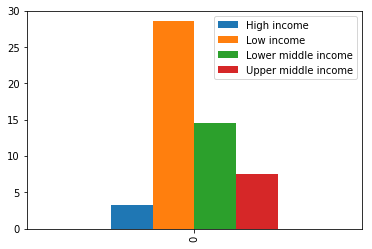

In [18]:
dfmediaHungry.plot.bar()
plt.show()

## Pergunta 2:  Quantas vezes cada país teve a maior expectativa de vida no mundo?

Na base "indicator-life_expectancy_at_birth.csv" tem a média de expectativa de vida de cada páis ao longo dos anos

In [19]:
csvExpectancy = "indicator-life_expectancy_at_birth.csv"
dfExpectancy = pd.read_csv(csvExpectancy)

In [20]:
dfExpectancy.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
7,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


Para cada ano somar 1 no pais que teve a maior expectativa de vida, para ver quantas vezes cada país ficou na frente

In [21]:
dictExpectancy = {}
for year in range(1800, 2006):
    country = dfExpectancy.loc[dfExpectancy[str(year)].idxmax()]["country"]
    if country in dictExpectancy:
        dictExpectancy[country] = dictExpectancy[country] + 1
    else:
        dictExpectancy[country] = 1

dictExpectancy

{'Iceland': 31,
 'Finland': 1,
 'Denmark': 13,
 'Norway': 90,
 'United Kingdom': 2,
 'Belgium': 1,
 'Sweden': 27,
 'Australia': 12,
 'Netherlands': 9,
 'Japan': 4,
 'Andorra': 16}

In [22]:
dfCountExpectancy = pd.DataFrame(dictExpectancy, index=[0])

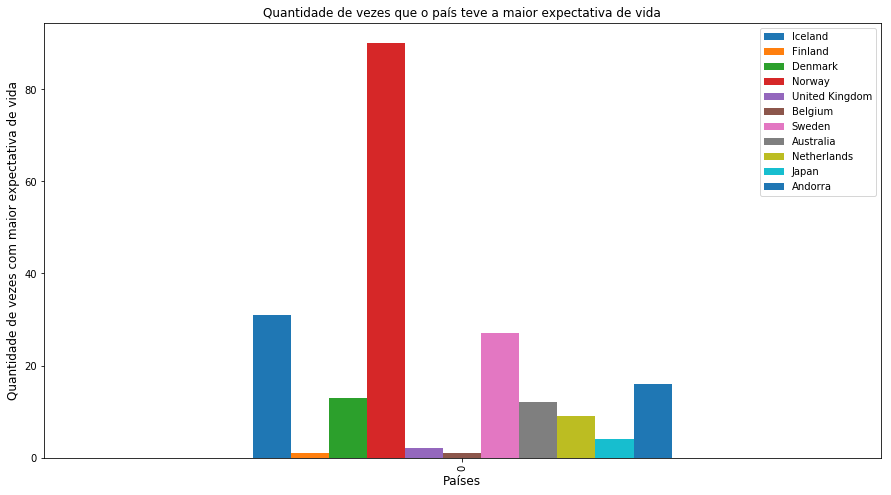

In [23]:
ax = dfCountExpectancy.plot(kind='bar', title ="Quantidade de vezes que o país teve a maior expectativa de vida", figsize=(15, 8))
ax.set_ylabel("Quantidade de vezes com maior expectativa de vida", fontsize=12)
ax.set_xlabel("Países", fontsize=12)
plt.show()

## Pergunta 3:  Qual a relação entre expectativa de vida e income? 

Juntando as bases e criando uma relação, considerando o ano de 2016:

In [24]:
dfHunger = pd.read_csv('datasets/hunger.csv')

In [25]:
dfHunger.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,Angola,AGO,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,Albania,ALB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,Andorra,AND,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,United Arab Emirates,ARE,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,Argentina,ARG,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,Armenia,ARM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,American Samoa,ASM,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_hunger_income = pd.merge(dfHunger_country_region_income, dfHunger, on='Country Code')

In [27]:
df_hunger_income.head(10)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5,Country Name,Indicator Name,Indicator Code,1960,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN,Aruba,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN,Afghanistan,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,22.100000,22.200000,23.400000,25.500000,27.600000,29.300000,30.300000,NaN,NaN,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN,Angola,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,40.400000,38.200000,35.100000,30.800000,27.000000,24.800000,23.900000,NaN,NaN,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN,Albania,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,7.400000,6.600000,6.000000,5.700000,5.500000,5.500000,5.500000,NaN,NaN,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN,Andorra,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN,Arab World,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,9.676187,9.403567,11.083189,11.224646,11.459653,11.782652,12.051903,NaN,NaN,NaN
6,ARE,Middle East & North Africa,High income,National Bureau of Statistics & Federal Compet...,United Arab Emirates,NaN,United Arab Emirates,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,5.900000,5.600000,5.100000,4.500000,3.900000,3.100000,2.500000,NaN,NaN,NaN
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census (I...,Argentina,NaN,Argentina,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,4.000000,3.900000,3.700000,3.500000,3.400000,3.600000,3.800000,NaN,NaN,NaN
8,ARM,Europe & Central Asia,Upper middle income,National Statistical Service of the Republic o...,Armenia,NaN,Armenia,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,5.500000,5.600000,5.100000,4.600000,4.300000,4.300000,4.300000,NaN,NaN,NaN
9,ASM,East Asia & Pacific,Upper middle income,BEA: https://www.bea.gov/national/gdp_territor...,American Samoa,NaN,American Samoa,Prevalence of undernourishment (% of population),SN.ITK.DEFC.ZS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for col in df_hunger_income.columns: 
    if col != "IncomeGroup" and col != "Country Name":
        del df_hunger_income[col]

In [29]:
df_hunger_income.head(10)

,IncomeGroup,Country Name
0,High income,Aruba
1,Low income,Afghanistan
2,Lower middle income,Angola
3,Upper middle income,Albania
4,High income,Andorra
5,NaN,Arab World
6,High income,United Arab Emirates
7,High income,Argentina
8,Upper middle income,Armenia
9,Upper middle income,American Samoa


In [30]:
df_hunger_income_expectancy = pd.merge(df_hunger_income, dfExpectancy, left_on='Country Name', right_on='country')

In [31]:
df_hunger_income_expectancy.head(10)

,IncomeGroup,Country Name,country,1800,1801,1802,1803,1804,1805,1806,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,High income,Aruba,Aruba,34.42,34.42,34.42,34.42,34.42,34.42,34.42,...,74.62,74.77,74.92,75.06,75.19,75.32,75.46,75.59,75.72,75.85
1,Low income,Afghanistan,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,...,52.40,52.80,53.30,53.60,54.00,54.40,54.80,54.90,53.80,52.72
2,Lower middle income,Angola,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.20,56.70,57.10,57.60,58.10,58.50,58.80,59.20,59.60,60.00
3,Upper middle income,Albania,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.60,76.80,77.00,77.20,77.40,77.50,77.70,77.90,78.00,78.10
4,High income,Andorra,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.50,84.60,84.60,84.70,84.70,84.70,84.80,84.80,84.80,84.80
5,High income,United Arab Emirates,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,75.60,75.60,75.60,75.60,75.50,75.50,75.40,75.40,75.40,75.40
6,High income,Argentina,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.20,75.40,75.60,75.80,76.00,76.10,76.20,76.30,76.50,76.70
7,Upper middle income,Armenia,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.30,72.30,72.60,73.00,73.50,73.90,74.30,74.50,74.70,74.90
8,Upper middle income,American Samoa,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.40,72.70,71.30,72.80,72.60,72.60,72.70,72.80,72.90,73.00
9,High income,Antigua and Barbuda,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.30,75.50,75.70,75.80,75.90,76.10,76.20,76.30,76.40,76.50


In [32]:
df_hunger_income_expectancy = df_hunger_income_expectancy.rename(columns={'2016': 'doisMilEDezesseis'})

Text(0.5, 1.0, 'Income x Life expectancy')

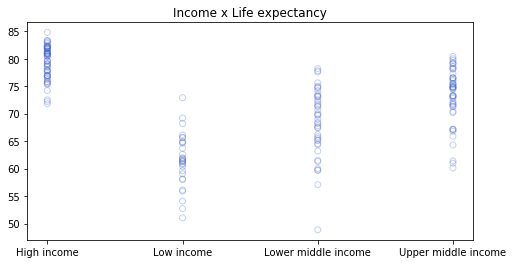

In [33]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.scatter(df_hunger_income_expectancy.IncomeGroup, df_hunger_income_expectancy.doisMilEDezesseis, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Income x Life expectancy')


# 4) Qual a relação entre desnutrição e expectativa de vida (2010 até 2016)

In [34]:
dfHunger = pd.read_csv('datasets/hunger.csv')
dfHunger_nutrition = dfHunger
for col in dfHunger_nutrition.columns: 
    if col != "2016" and col != "Country Name":
        del dfHunger_nutrition[col]


In [35]:
dfHunger.head(10)

,Country Name,2016
0,Aruba,NaN
1,Afghanistan,30.300000
2,Angola,23.900000
3,Albania,5.500000
4,Andorra,NaN
5,Arab World,12.051903
6,United Arab Emirates,2.500000
7,Argentina,3.800000
8,Armenia,4.300000
9,American Samoa,NaN


In [36]:
dfHunger_nutrition = dfHunger_nutrition.rename(columns={'2016': 'doisMilEDezesseisNutrition'})

In [37]:
dfHunger_nutrition

,Country Name,doisMilEDezesseisNutrition
0,Aruba,NaN
1,Afghanistan,30.300000
2,Angola,23.900000
3,Albania,5.500000
4,Andorra,NaN
5,Arab World,12.051903
6,United Arab Emirates,2.500000
7,Argentina,3.800000
8,Armenia,4.300000
9,American Samoa,NaN


In [38]:
df_hunger_nutrition_expectancy = pd.merge(dfHunger_nutrition, dfExpectancy, left_on='Country Name', right_on='country').dropna()

In [39]:
df_hunger_nutrition_expectancy

,Country Name,doisMilEDezesseisNutrition,country,1800,1801,1802,1803,1804,1805,1806,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Afghanistan,30.3,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Angola,23.9,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
3,Albania,5.5,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
5,United Arab Emirates,2.5,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,75.6,75.6,75.6,75.6,75.5,75.5,75.4,75.4,75.4,75.40
6,Argentina,3.8,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.2,75.4,75.6,75.8,76.0,76.1,76.2,76.3,76.5,76.70
7,Armenia,4.3,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.3,72.3,72.6,73.0,73.5,73.9,74.3,74.5,74.7,74.90
10,Australia,2.5,Australia,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,81.5,81.6,81.8,82.0,82.2,82.4,82.4,82.3,82.3,82.30
11,Austria,2.5,Austria,34.40,34.40,34.40,34.40,34.40,34.40,34.40,...,80.1,80.4,80.3,80.5,80.7,80.9,81.1,81.2,81.3,81.40
12,Azerbaijan,2.5,Azerbaijan,29.17,29.17,29.17,29.17,29.17,29.17,29.17,...,69.1,69.2,69.7,70.1,70.8,71.5,72.1,72.5,72.9,73.30
14,Belgium,2.5,Belgium,40.00,40.01,40.02,40.02,40.03,40.04,40.05,...,79.5,79.6,79.8,80.1,80.2,80.3,80.4,80.5,80.5,80.50


In [40]:
df_hunger_nutrition_expectancy = df_hunger_nutrition_expectancy.rename(columns={'2016': 'doisMilEDezesseisExpectancy'})

In [41]:
df_hunger_nutrition_expectancy

,Country Name,doisMilEDezesseisNutrition,country,1800,1801,1802,1803,1804,1805,1806,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,doisMilEDezesseisExpectancy
1,Afghanistan,30.3,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Angola,23.9,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
3,Albania,5.5,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
5,United Arab Emirates,2.5,United Arab Emirates,30.70,30.70,30.70,30.70,30.70,30.70,30.70,...,75.6,75.6,75.6,75.6,75.5,75.5,75.4,75.4,75.4,75.40
6,Argentina,3.8,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.2,75.4,75.6,75.8,76.0,76.1,76.2,76.3,76.5,76.70
7,Armenia,4.3,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.3,72.3,72.6,73.0,73.5,73.9,74.3,74.5,74.7,74.90
10,Australia,2.5,Australia,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,81.5,81.6,81.8,82.0,82.2,82.4,82.4,82.3,82.3,82.30
11,Austria,2.5,Austria,34.40,34.40,34.40,34.40,34.40,34.40,34.40,...,80.1,80.4,80.3,80.5,80.7,80.9,81.1,81.2,81.3,81.40
12,Azerbaijan,2.5,Azerbaijan,29.17,29.17,29.17,29.17,29.17,29.17,29.17,...,69.1,69.2,69.7,70.1,70.8,71.5,72.1,72.5,72.9,73.30
14,Belgium,2.5,Belgium,40.00,40.01,40.02,40.02,40.03,40.04,40.05,...,79.5,79.6,79.8,80.1,80.2,80.3,80.4,80.5,80.5,80.50


Text(0.5, 1.0, 'Desnutrição x Expectativa de vida')

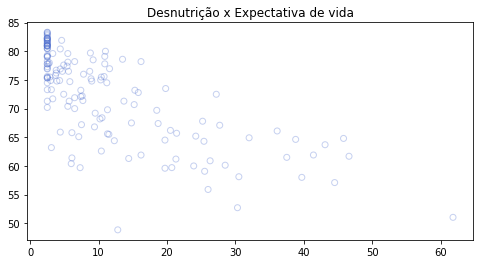

In [42]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.scatter(df_hunger_nutrition_expectancy.doisMilEDezesseisNutrition, df_hunger_nutrition_expectancy.doisMilEDezesseisExpectancy, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('Desnutrição x Expectativa de vida')

# 5) Qual a relação entre Expectativa de vida e gasto do governo com a saúde no Brasil ?

Vamos utilizar a base de quanto cada governo gasta com saúde: https://www.kaggle.com/angelmm/healthteethsugar#healthexpend.csv

In [43]:
df_health_expend = pd.read_csv('datasets/healthexpend.csv')

In [44]:
df_health_expend.head(10)

,Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,897.181541,982.794819,966.484960,1338.295221,942.421563,862.391612,889.589911,1022.332657,1297.395724,1517.211905,1628.698412,1853.281652,2102.019346,2369.684492,2357.761806,2172.379162
7,Angola,13.516833,8.724155,10.527305,6.648744,6.548254,12.514473,18.320510,14.311165,19.364537,19.664783,27.121077,50.848735,68.385205,125.545110,180.914189,101.591527
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,233.093441,227.111427,245.814244,263.587486,277.832613,281.392962,265.678108,266.949412,278.509762,290.616312,304.669749,350.984695,396.555105,408.585690,403.158318,489.455700


In [45]:
df_health_expend = df_health_expend.rename(columns={'Per.capita.government.expenditure.on.health.at.average.exchange.rate..US..': 'PerCapitaCountry'})

In [46]:
df_health_expend.head(10)

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832643,1.250118,1.614160,2.525066,2.813779,3.503426,3.744613,3.908887,4.390408
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,13.940591,17.062074,14.164771,18.625848,28.139706,27.160512,30.509619,32.549902,40.609457,63.935601,71.356600,75.552514,88.762634,109.074284,106.893745,94.023613
4,Algeria,46.771460,47.960053,49.738400,48.670547,45.543825,45.911115,52.509423,54.078381,62.637209,63.229395,69.295636,81.679706,108.904747,147.820706,143.160577,138.840923
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,897.181541,982.794819,966.484960,1338.295221,942.421563,862.391612,889.589911,1022.332657,1297.395724,1517.211905,1628.698412,1853.281652,2102.019346,2369.684492,2357.761806,2172.379162
7,Angola,13.516833,8.724155,10.527305,6.648744,6.548254,12.514473,18.320510,14.311165,19.364537,19.664783,27.121077,50.848735,68.385205,125.545110,180.914189,101.591527
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,233.093441,227.111427,245.814244,263.587486,277.832613,281.392962,265.678108,266.949412,278.509762,290.616312,304.669749,350.984695,396.555105,408.585690,403.158318,489.455700


In [47]:
df_health_expend_Brazil = df_health_expend.loc[df_health_expend['PerCapitaCountry'].isin(['Brazil'])]

In [48]:
df_health_expend_Brazil

,PerCapitaCountry,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
29,Brazil,135.900298,141.870908,152.67535,143.057917,103.402,106.753682,96.301297,90.662876,94.77184,121.043907,155.551585,204.988096,255.086881,305.735742,319.844706,465.67404


Temos os dados de gasto com a saúde entre 1995 e 2010, agora vamos pegar os dados de expectativa de vida entre esses anos

In [49]:
df_expectancy_Brazil = dfExpectancy.loc[dfExpectancy['country'].isin(['Brazil'])]

In [50]:
df_expectancy_Brazil

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
29,Brazil,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,73.0,73.2,73.4,73.6,73.8,74.0,74.1,74.3,74.4,74.5


In [51]:
for col in df_expectancy_Brazil.columns: 
    if col != "country" and col != "1995" and col != "1996" and col != "1997" and col != "1998" and col != "1999" and col != "2000" and col != "2001" and col != "2002" and col != "2003" and col != "2004" and col != "2005" and col != "2006" and col != "2007" and col != "2008" and col != "2009" and col != "2010":
        del df_expectancy_Brazil[col]

In [52]:
df_expectancy_Brazil

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
29,Brazil,69.0,69.3,69.6,69.9,70.3,70.7,71.1,71.4,71.7,72.0,72.4,72.7,73.0,73.2,73.4,73.6


Agora vamos remover a coluna "country" dos dois data frames para conseguir fazer o gráfico correto

In [53]:
del df_health_expend_Brazil['PerCapitaCountry']

In [54]:
df_health_expend_Brazil

,X1995,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010
29,135.900298,141.870908,152.67535,143.057917,103.402,106.753682,96.301297,90.662876,94.77184,121.043907,155.551585,204.988096,255.086881,305.735742,319.844706,465.67404


In [55]:
del df_expectancy_Brazil['country']

In [56]:
df_expectancy_Brazil

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
29,69.0,69.3,69.6,69.9,70.3,70.7,71.1,71.4,71.7,72.0,72.4,72.7,73.0,73.2,73.4,73.6


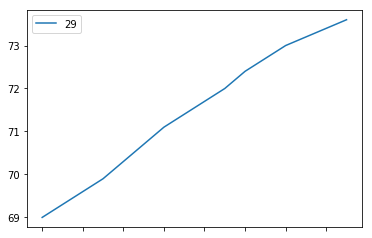

In [57]:
df_expectancy_Brazil.T.plot.line()

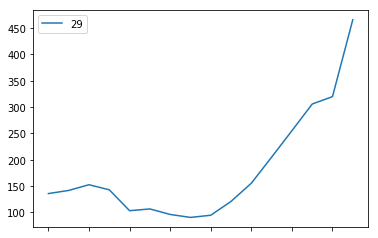

In [58]:
df_health_expend_Brazil.T.plot.line()

Conclusão: o aumenta de expectativa de vida no Brasil não teve relação direta com o quanto o governo gastou com saúde. 

# 6) Qual foi a média de expectativa de vida do mundo no período de 1800-2016?

In [59]:
median_expectancy = dfExpectancy.dropna().median()

In [60]:
median_expectancy.index

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=217)

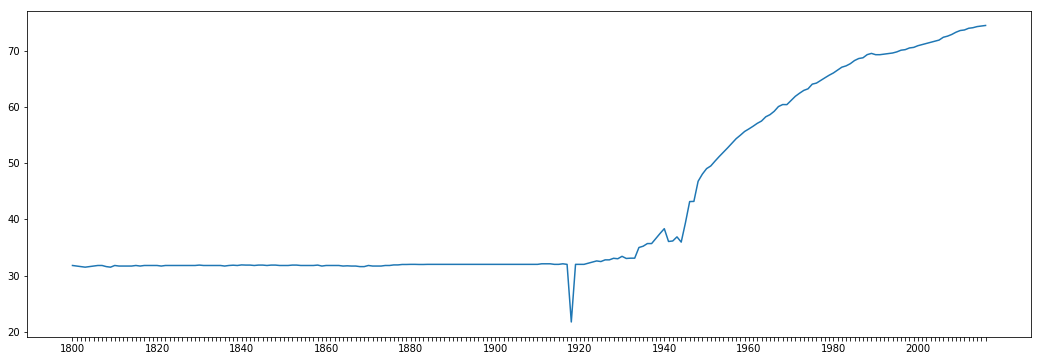

In [61]:
fig, ax = plt.subplots(figsize=(18,6))

ax.plot(median_expectancy.index,median_expectancy)

every_nth = 20
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


# 7) Qual a distribuição do IDH por rendimento no mundo?

Nova base: http://hdr.undp.org/en/data# -> Human Development Index (HDI).csv

In [62]:
years = [str(item) for item in list(range(1990, 2017))] + ['Country']
df_idh = pd.read_csv("datasets/Human Development Index (HDI).csv",  encoding = "ISO-8859-1", skiprows=1, usecols=years).dropna().set_index("Country", drop = True)


In [63]:
df_idh.head(10)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,0.662,...,0.720,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782
Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,0.636,...,0.707,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753
Argentina,0.704,0.713,0.720,0.725,0.728,0.731,0.738,0.746,0.753,0.764,...,0.792,0.795,0.799,0.813,0.819,0.818,0.820,0.820,0.822,0.822
Armenia,0.631,0.628,0.580,0.588,0.599,0.605,0.612,0.623,0.636,0.642,...,0.720,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749
Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,0.892,0.895,...,0.915,0.920,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938
Austria,0.795,0.800,0.805,0.807,0.813,0.817,0.820,0.824,0.835,0.834,...,0.881,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906
Bahrain,0.746,0.752,0.757,0.765,0.769,0.775,0.778,0.779,0.783,0.786,...,0.796,0.796,0.794,0.796,0.798,0.800,0.807,0.810,0.832,0.846
Bangladesh,0.387,0.394,0.402,0.409,0.417,0.425,0.433,0.442,0.451,0.460,...,0.520,0.523,0.535,0.545,0.557,0.567,0.575,0.583,0.592,0.597
Barbados,0.716,0.718,0.718,0.721,0.727,0.731,0.735,0.740,0.736,0.743,...,0.777,0.781,0.783,0.782,0.787,0.795,0.796,0.796,0.797,0.799


In [64]:
df_idh_2016 = df_idh
for col in df_idh_2016.columns: 
    if col != "2016" and col != "Country":
        del df_idh_2016[col]

In [65]:
df_idh_2016 = df_idh_2016.rename(columns={'2016': 'idh2016'})

In [66]:
df_idh_2016.head(10)

,idh2016
Country,
Albania,0.782
Algeria,0.753
Argentina,0.822
Armenia,0.749
Australia,0.938
Austria,0.906
Bahrain,0.846
Bangladesh,0.597
Barbados,0.799


In [67]:
dfHunger_country_region_income.head(10)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,Central Bureau of Statistics and Central Bank ...,Aruba,NaN
1,AFG,South Asia,Low income,Central Statistics Organization; World Bank st...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,IMF ; Source of population estimates: UN Popul...,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,Albanian Institute of Statistics ; Source of p...,Albania,NaN
4,AND,Europe & Central Asia,High income,"Government of Andorra, Department of Statistic...",Andorra,NaN
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World,NaN
6,ARE,Middle East & North Africa,High income,National Bureau of Statistics & Federal Compet...,United Arab Emirates,NaN
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census (I...,Argentina,NaN
8,ARM,Europe & Central Asia,Upper middle income,National Statistical Service of the Republic o...,Armenia,NaN
9,ASM,East Asia & Pacific,Upper middle income,BEA: https://www.bea.gov/national/gdp_territor...,American Samoa,NaN


In [68]:
income_idh = []
for index, row in dfHunger_country_region_income.iterrows():
    if ' '+row.TableName in df_idh_2016.index.format():
        income_idh.append({'country': row.TableName, 'income': row.IncomeGroup, 'idh': df_idh_2016.loc[' '+row.TableName].idh2016})

In [69]:
income_idh

[{'country': 'Albania', 'income': 'Upper middle income', 'idh': 0.782},
 {'country': 'United Arab Emirates', 'income': 'High income', 'idh': 0.862},
 {'country': 'Argentina', 'income': 'High income', 'idh': 0.8220000000000001},
 {'country': 'Armenia',
  'income': 'Upper middle income',
  'idh': 0.7490000000000001},
 {'country': 'Australia', 'income': 'High income', 'idh': 0.938},
 {'country': 'Austria', 'income': 'High income', 'idh': 0.9059999999999999},
 {'country': 'Burundi', 'income': 'Low income', 'idh': 0.418},
 {'country': 'Belgium', 'income': 'High income', 'idh': 0.915},
 {'country': 'Benin', 'income': 'Low income', 'idh': 0.512},
 {'country': 'Bangladesh', 'income': 'Lower middle income', 'idh': 0.597},
 {'country': 'Bulgaria', 'income': 'Upper middle income', 'idh': 0.81},
 {'country': 'Bahrain', 'income': 'High income', 'idh': 0.846},
 {'country': 'Belize',
  'income': 'Upper middle income',
  'idh': 0.7090000000000001},
 {'country': 'Brazil', 'income': 'Upper middle income

In [70]:
df_income_idh = pd.DataFrame(income_idh)

In [71]:
df_income_idh.head(10)

,country,idh,income
0,Albania,0.782,Upper middle income
1,United Arab Emirates,0.862,High income
2,Argentina,0.822,High income
3,Armenia,0.749,Upper middle income
4,Australia,0.938,High income
5,Austria,0.906,High income
6,Burundi,0.418,Low income
7,Belgium,0.915,High income
8,Benin,0.512,Low income
9,Bangladesh,0.597,Lower middle income


In [72]:
df_income_idh_upper = df_income_idh[df_income_idh.income == 'Upper middle income']
df_income_idh_high = df_income_idh[df_income_idh.income == 'High income']
df_income_idh_low = df_income_idh[df_income_idh.income == 'Low income']
df_income_idh_lower = df_income_idh[df_income_idh.income == 'Lower middle income']

In [73]:
df_income_idh_lower.idh.values

array([0.597, 0.486, 0.553, 0.588, 0.614, 0.691, 0.636, 0.585, 0.576,
       0.768, 0.516, 0.662, 0.574, 0.743, 0.516, 0.657, 0.56 , 0.696,
       0.543, 0.499, 0.679, 0.732, 0.746, 0.586])

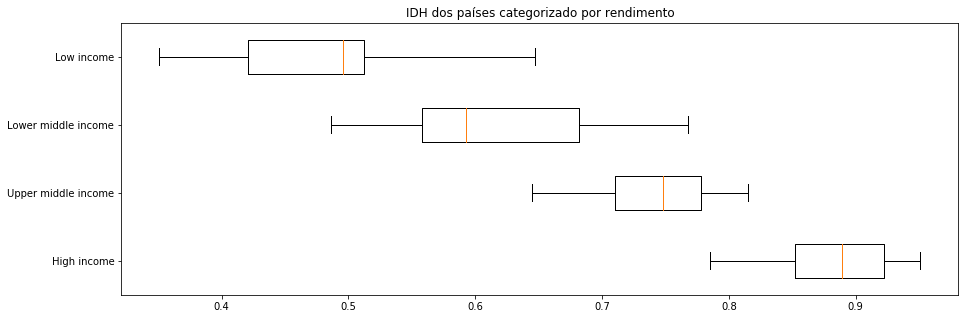

In [74]:
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot([df_income_idh_high.idh.values, df_income_idh_upper.idh.values, df_income_idh_lower.idh.values, df_income_idh_low.idh.values], widths=0.5, labels=['High income', 'Upper middle income', 'Lower middle income', 'Low income'], vert=False)
ax.set_title('IDH dos países categorizado por rendimento')
pass

# 8) Existe relação com expectativa de vida e IDH, considerando o ano de 2006?

In [75]:
dfExpectancy.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
7,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.3,75.5,75.7,75.8,75.9,76.1,76.2,76.3,76.4,76.50


In [76]:
df_expectancy_2016 = dfExpectancy.rename(columns={'2016': 'expectancy2016'}).dropna()

In [77]:
df_expectancy_2016

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,expectancy2016
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.40,52.80,53.30,53.60,54.00,54.40,54.80,54.90,53.80,52.72
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.60,76.80,77.00,77.20,77.40,77.50,77.70,77.90,78.00,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.30,75.50,75.70,76.00,76.10,76.20,76.30,76.30,76.40,76.50
7,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,56.20,56.70,57.10,57.60,58.10,58.50,58.80,59.20,59.60,60.00
9,Antigua and Barbuda,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,33.54,...,75.30,75.50,75.70,75.80,75.90,76.10,76.20,76.30,76.40,76.50
10,Argentina,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,33.20,...,75.20,75.40,75.60,75.80,76.00,76.10,76.20,76.30,76.50,76.70
11,Armenia,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,34.00,...,72.30,72.30,72.60,73.00,73.50,73.90,74.30,74.50,74.70,74.90
12,Aruba,34.42,34.42,34.42,34.42,34.42,34.42,34.42,34.42,34.42,...,74.62,74.77,74.92,75.06,75.19,75.32,75.46,75.59,75.72,75.85
13,Australia,34.05,34.05,34.05,34.05,34.05,34.05,34.05,34.05,34.05,...,81.50,81.60,81.80,82.00,82.20,82.40,82.40,82.30,82.30,82.30
14,Austria,34.40,34.40,34.40,34.40,34.40,34.40,34.40,34.40,34.40,...,80.10,80.40,80.30,80.50,80.70,80.90,81.10,81.20,81.30,81.40


In [78]:
df_idh_2016.head(10)

,idh2016
Country,
Albania,0.782
Algeria,0.753
Argentina,0.822
Armenia,0.749
Australia,0.938
Austria,0.906
Bahrain,0.846
Bangladesh,0.597
Barbados,0.799


In [79]:
expectancy_idh = []
for index, row in df_expectancy_2016.iterrows():
        if ' '+row.country in df_idh_2016.index.format():
            expectancy_idh.append({'country': row.country, 'expectancy': row.expectancy2016, 'idh': df_idh_2016.loc[' '+row.country].idh2016})

In [80]:
expectancy_idh

[{'country': 'Albania', 'expectancy': 78.1, 'idh': 0.782},
 {'country': 'Algeria', 'expectancy': 76.5, 'idh': 0.753},
 {'country': 'Argentina', 'expectancy': 76.7, 'idh': 0.8220000000000001},
 {'country': 'Armenia', 'expectancy': 74.9, 'idh': 0.7490000000000001},
 {'country': 'Australia', 'expectancy': 82.3, 'idh': 0.938},
 {'country': 'Austria', 'expectancy': 81.4, 'idh': 0.9059999999999999},
 {'country': 'Bahrain', 'expectancy': 79.1, 'idh': 0.846},
 {'country': 'Bangladesh', 'expectancy': 70.7, 'idh': 0.597},
 {'country': 'Barbados', 'expectancy': 75.8, 'idh': 0.799},
 {'country': 'Belgium', 'expectancy': 80.5, 'idh': 0.915},
 {'country': 'Belize', 'expectancy': 71.9, 'idh': 0.7090000000000001},
 {'country': 'Benin', 'expectancy': 62.6, 'idh': 0.512},
 {'country': 'Botswana', 'expectancy': 60.13, 'idh': 0.7120000000000001},
 {'country': 'Brazil', 'expectancy': 74.5, 'idh': 0.758},
 {'country': 'Bulgaria', 'expectancy': 74.9, 'idh': 0.81},
 {'country': 'Burundi', 'expectancy': 61.4, 

In [81]:
df_expectancy_idh = pd.DataFrame(expectancy_idh)

In [82]:
df_expectancy_idh.head(10)

,country,expectancy,idh
0,Albania,78.1,0.782
1,Algeria,76.5,0.753
2,Argentina,76.7,0.822
3,Armenia,74.9,0.749
4,Australia,82.3,0.938
5,Austria,81.4,0.906
6,Bahrain,79.1,0.846
7,Bangladesh,70.7,0.597
8,Barbados,75.8,0.799
9,Belgium,80.5,0.915


Text(0.5, 1.0, 'IDH x Expectativa de vida')

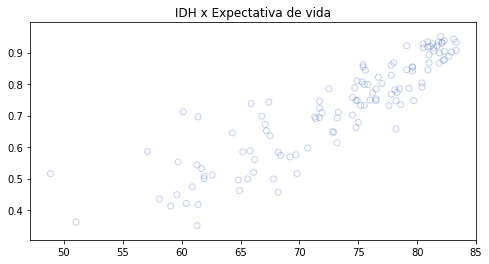

In [83]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.scatter(df_expectancy_idh.expectancy, df_expectancy_idh.idh, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('IDH x Expectativa de vida')

# 9) Existe relação com expectativa de vida e IDH no ano de 2016?

In [84]:
years = [str(item) for item in [1990, 1995, 2000, 2005, 2010, 2011, 2012, 2013, 2014, 2015, 2016]] + ['Country']
df_hiv = pd.read_csv("datasets/HIV prevalence, adult (% ages 15-49), total.csv",  encoding = "ISO-8859-1", skiprows=1, usecols=years).dropna().set_index("Country", drop = True)


In [85]:
df_hiv.head(10)

,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,
Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Albania,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Algeria,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Angola,0.2,0.6,1.0,1.4,1.7,1.8,1.8,1.8,1.8,1.9,1.9
Argentina,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
Armenia,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Australia,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Azerbaijan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Bahamas,1.0,2.3,2.9,2.9,3.0,3.0,3.1,3.1,3.1,3.2,3.3


In [86]:
df_hiv_2016 = df_hiv.rename(columns={'2016': 'hiv2016'}).dropna()

In [87]:
df_hiv_2016.head(10)

,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,hiv2016
Country,,,,,,,,,,,
Afghanistan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Albania,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Algeria,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Angola,0.2,0.6,1.0,1.4,1.7,1.8,1.8,1.8,1.8,1.9,1.9
Argentina,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
Armenia,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
Australia,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Azerbaijan,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Bahamas,1.0,2.3,2.9,2.9,3.0,3.0,3.1,3.1,3.1,3.2,3.3


In [88]:
hiv_idh = []
for index, row in df_hiv_2016.iterrows():
        if index in df_idh_2016.index.format():
            hiv_idh.append({'country': index, 'hiv': row.hiv2016, 'idh': df_idh_2016.loc[index].idh2016})

In [89]:
hiv_idh

[{'country': ' Albania', 'hiv': 0.1, 'idh': 0.782},
 {'country': ' Algeria', 'hiv': 0.1, 'idh': 0.753},
 {'country': ' Argentina', 'hiv': 0.4, 'idh': 0.8220000000000001},
 {'country': ' Armenia', 'hiv': 0.2, 'idh': 0.7490000000000001},
 {'country': ' Australia', 'hiv': 0.1, 'idh': 0.938},
 {'country': ' Bahrain', 'hiv': 0.1, 'idh': 0.846},
 {'country': ' Bangladesh', 'hiv': 0.1, 'idh': 0.597},
 {'country': ' Barbados', 'hiv': 1.3, 'idh': 0.799},
 {'country': ' Belize', 'hiv': 1.8, 'idh': 0.7090000000000001},
 {'country': ' Benin', 'hiv': 1.0, 'idh': 0.512},
 {'country': ' Bolivia (Plurinational State of)',
  'hiv': 0.3,
  'idh': 0.6890000000000001},
 {'country': ' Botswana', 'hiv': 21.9, 'idh': 0.7120000000000001},
 {'country': ' Brazil', 'hiv': 0.6, 'idh': 0.758},
 {'country': ' Bulgaria', 'hiv': 0.1, 'idh': 0.81},
 {'country': ' Burundi', 'hiv': 1.1, 'idh': 0.418},
 {'country': ' Cambodia', 'hiv': 0.6, 'idh': 0.5760000000000001},
 {'country': ' Cameroon', 'hiv': 3.8, 'idh': 0.5529999

In [90]:
df_hiv_idh = pd.DataFrame(hiv_idh)

In [91]:
df_hiv_idh.head(10)

,country,hiv,idh
0,Albania,0.1,0.782
1,Algeria,0.1,0.753
2,Argentina,0.4,0.822
3,Armenia,0.2,0.749
4,Australia,0.1,0.938
5,Bahrain,0.1,0.846
6,Bangladesh,0.1,0.597
7,Barbados,1.3,0.799
8,Belize,1.8,0.709
9,Benin,1.0,0.512


Text(0.5, 1.0, 'HIV x IDH')

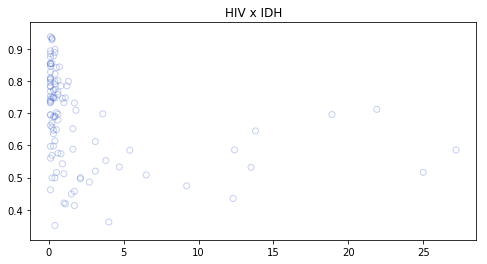

In [92]:
fig, ax1 = plt.subplots(figsize=(8,4))

ax1.scatter(df_hiv_idh.hiv, df_hiv_idh.idh, alpha=0.3, facecolors='none', color='#4466cc')
ax1.set_title('HIV x IDH')

# 10) Qual foi a média de IDH no mundo no período de 1990-2016?

In [93]:
df_hiv_media = df_hiv.dropna().median()

In [94]:
df_hiv_media.head(10)

1990    0.1
1995    0.3
2000    0.4
2005    0.4
2010    0.5
2011    0.5
2012    0.5
2013    0.5
2014    0.5
2015    0.5
dtype: float64

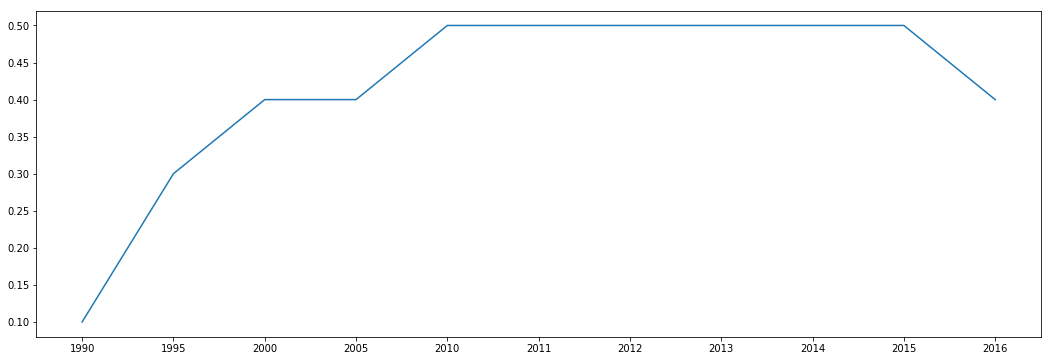

In [95]:
fig, ax = plt.subplots(figsize=(18,6))

ax.plot(df_hiv_media.index,df_hiv_media)

Podemos perceber um crescimento na média do índice de HIV no mundo até o ano de 2010, depois establizou até 2015, onde começou a diminuir